In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('movies.csv', sep=';', thousands=',')

In [41]:
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,1972,R,175 min,Comedy,9.2,1860471,$134.97M
1,2.0,The Silence of the Lambs,1991,R,118 min,Crime,8.6,1435344,$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,1980,PG,124 min,Fantasy,8.7,1294805,$290.48M
3,4.0,The Shawshank Redemption,1994,R,142 min,Drama,9.3,2683302,$28.34M
4,5.0,The Shining,1980,R,146 min,Horror,8.4,1025560,$44.02M


In [42]:
# For category VS genre, I expect a slight correlation between the two columns because, 
# for example, a horror film is probably not suitable for children and thus would receive a higher rating.

In [43]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

In [44]:
contingencyTableCategoryGenre = create_contingency_table(df, 'category','genre')

In [45]:
contingencyTableCategoryGenre

category,G,PG,PG-13,R
genre,,,,
Action,0,0,1,11
Adventure,3,2,4,1
Comedy,3,2,0,4
Crime,1,0,2,11
Drama,0,1,2,7
Fantasy,0,4,1,0
Horror,0,0,0,7
Mystery,1,1,0,8
Romance,2,3,2,4


In [46]:
# Yes, almost for every category or genre there is a different ratio.

<AxesSubplot:xlabel='genre'>

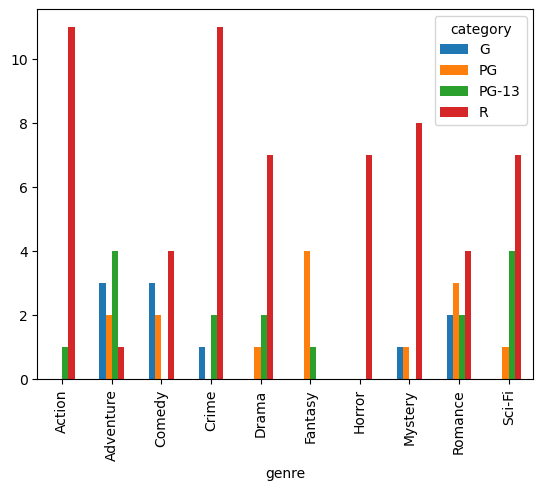

In [47]:
contingencyTableCategoryGenre.plot(kind='bar')

In [48]:
# Yes, there is a lot of difference between the categories, but most of the categories
# are R rated except for Fantasy. All categories have some movies that are PG-13 rated 
# except for Comedy, Horror and Mystery. The same goes for the G and PG category, some 
# some categories have them and some don not.

In [49]:
from scipy.stats import chi2_contingency # Contigency: eventually
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [50]:
check_cat_vs_cat_correlation(df, 'category','genre')

The odds of a correlation between category and genre is 99.98493805806362% (Based on a p value of 0.00015061941936376805).
This percentage needs to be at least 95% for a significant correlation.


In [51]:
# The result of the chi-square test shows that there is 99.98 percent chance of correlation 
# between category and genre.